**This problem uses to a dataset on direct phone marketing campaigns of a Portuguese bank. The data files are available on Canvas. See the file bank marketing info for more details and the full list of variables. The goal is to predict if a client will subscribe (yes or no) to the product that was being marketed, a particular type of deposit account. The data set has already been divided at random into training and testing parts that contain 70% and 30% of the clients respectively.**

In [102]:
train = read.csv("bank_marketing_train.csv")
test = read.csv("bank_marketing_test.csv")

In [18]:
head(train)
head(test)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,27,blue-collar,married,secondary,no,61,yes,no,unknown,19,jun,1012,1,-1,0,unknown,yes
2,50,blue-collar,divorced,secondary,no,204,yes,yes,unknown,14,may,421,1,-1,0,unknown,no
3,34,management,single,tertiary,no,171,yes,no,cellular,7,may,191,1,294,1,failure,no
4,27,student,single,tertiary,no,118,no,no,cellular,31,aug,160,3,98,1,failure,yes
5,36,management,single,unknown,no,62,no,no,cellular,13,jul,311,1,91,2,success,yes
6,38,blue-collar,single,primary,no,0,yes,no,cellular,7,may,350,2,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
2,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
3,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
4,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
5,30,blue-collar,married,secondary,no,309,yes,no,unknown,7,may,1574,2,-1,0,unknown,yes
6,32,blue-collar,single,primary,no,611,yes,no,unknown,8,may,541,3,-1,0,unknown,yes


## 1. Perform a (brief) exploratory data analysis of the training data, focusing on the relationship between the response variable and the rest.

In [175]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)

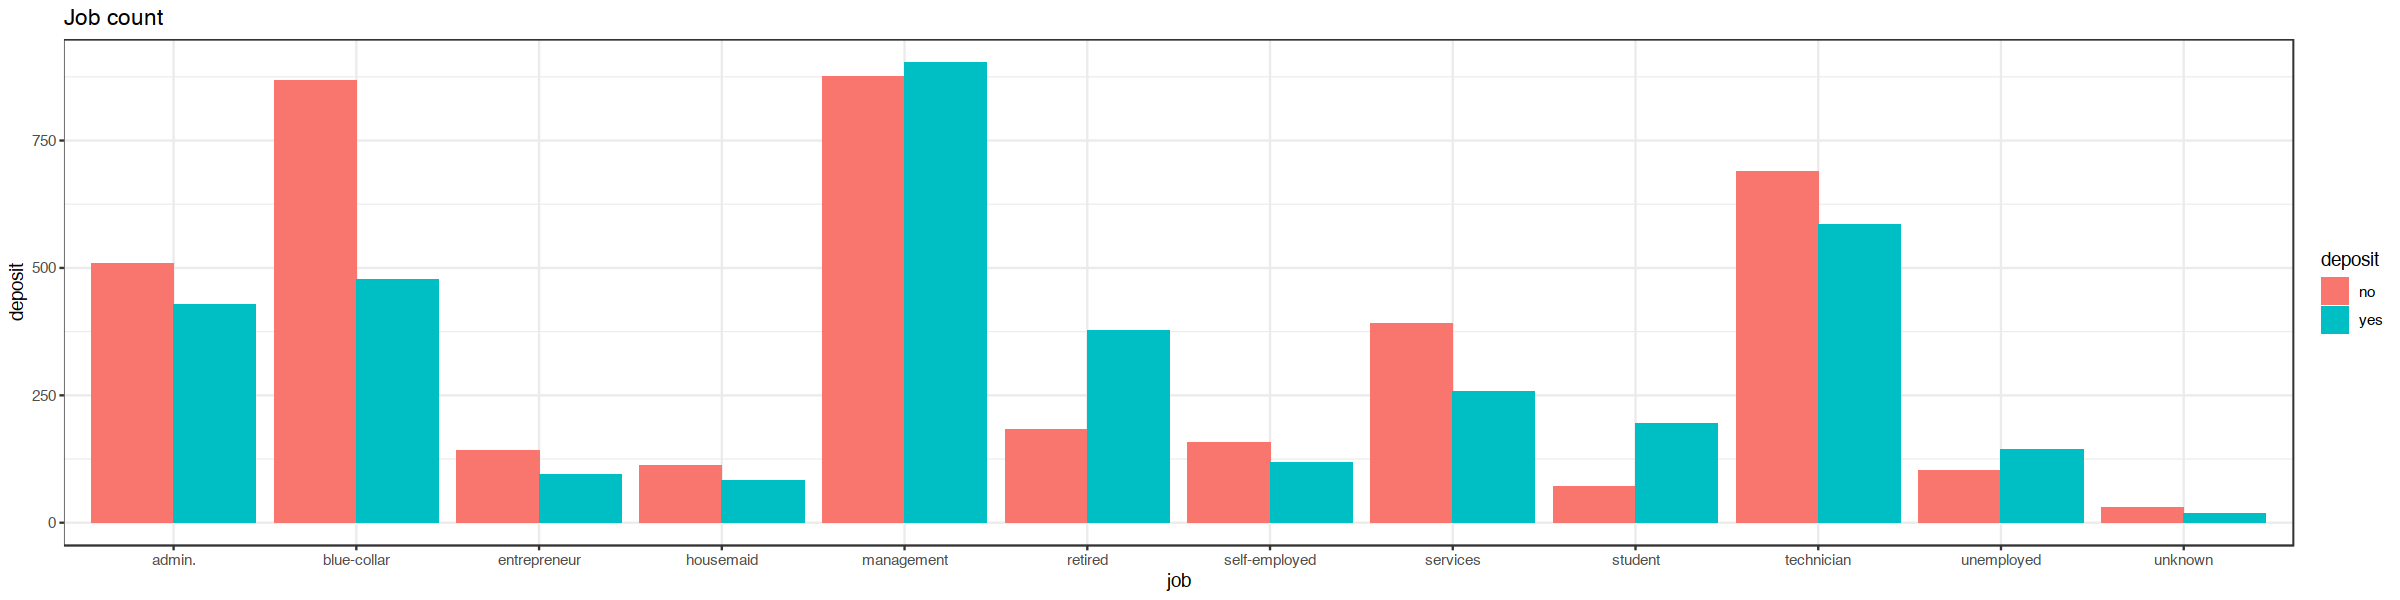

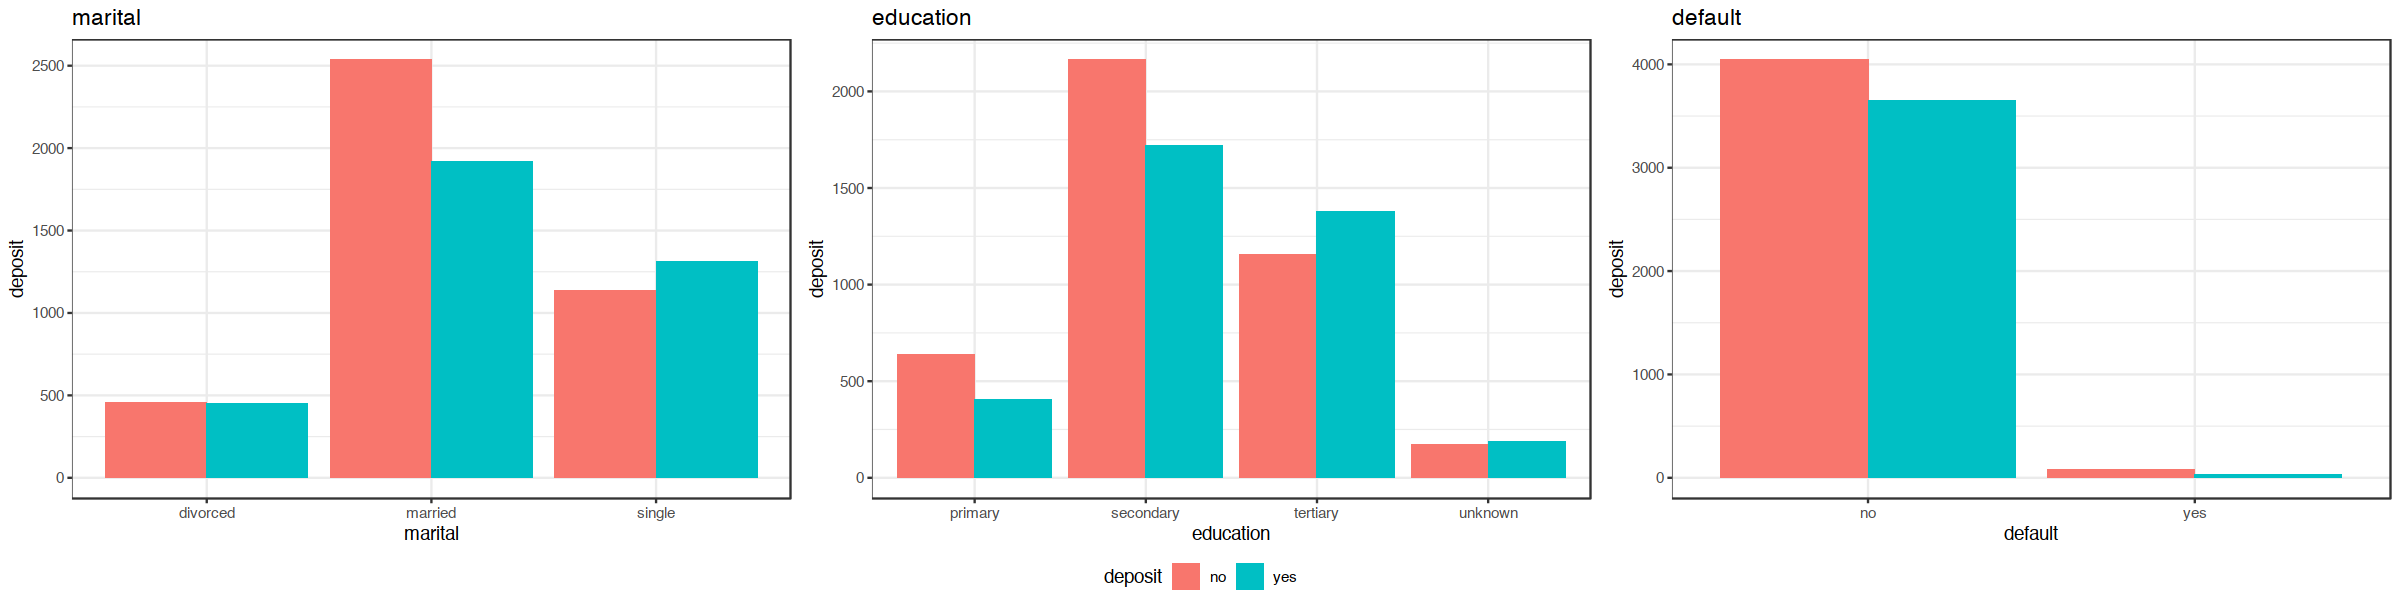

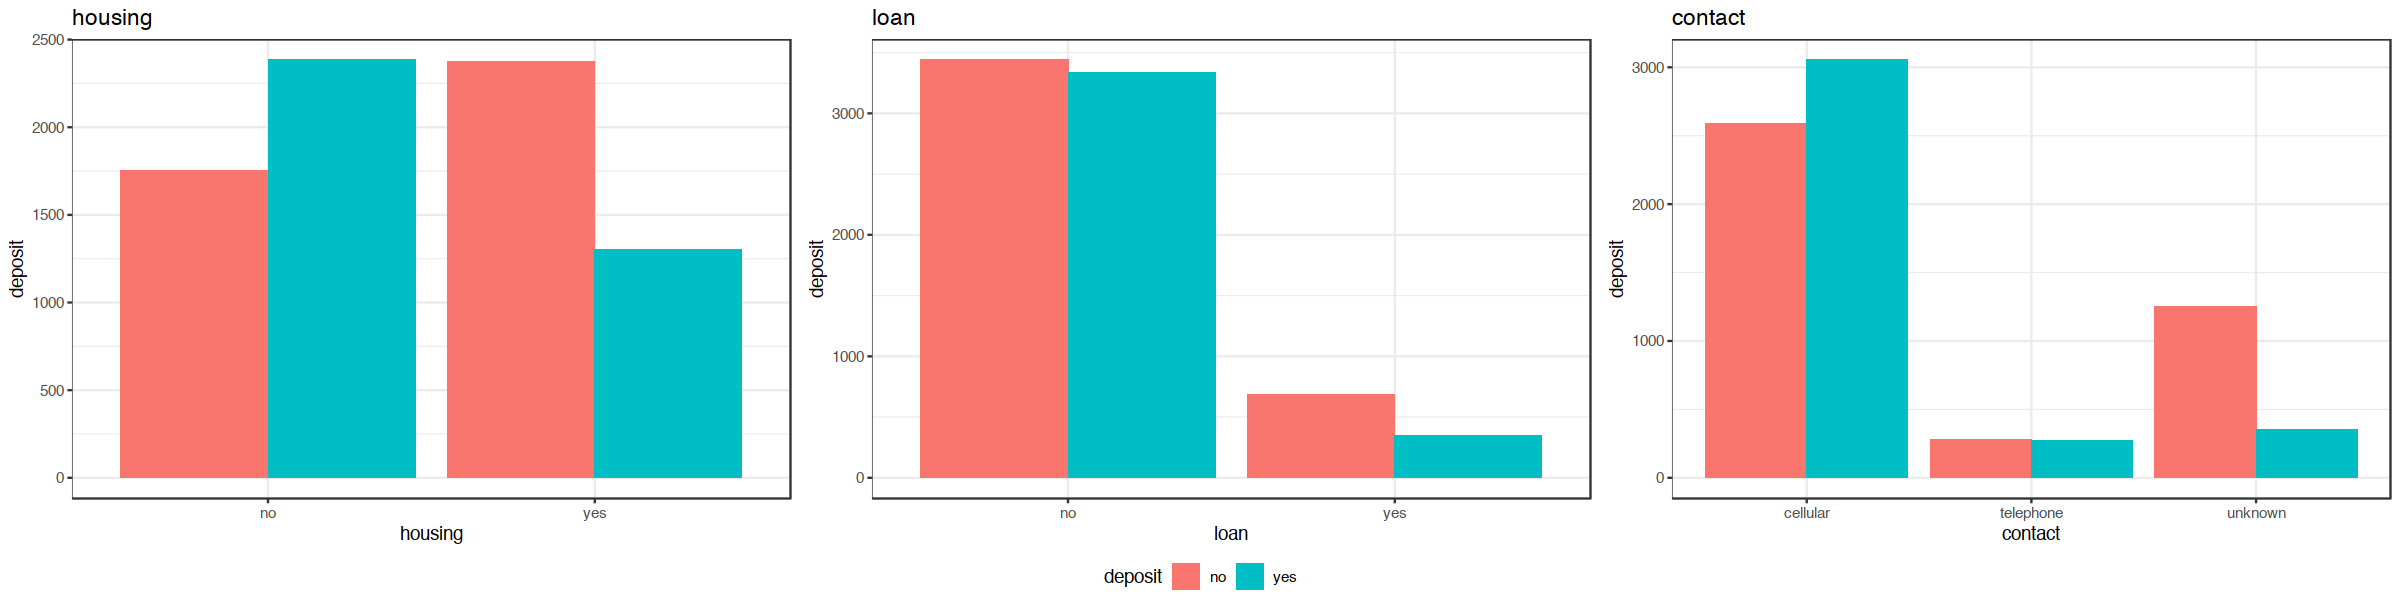

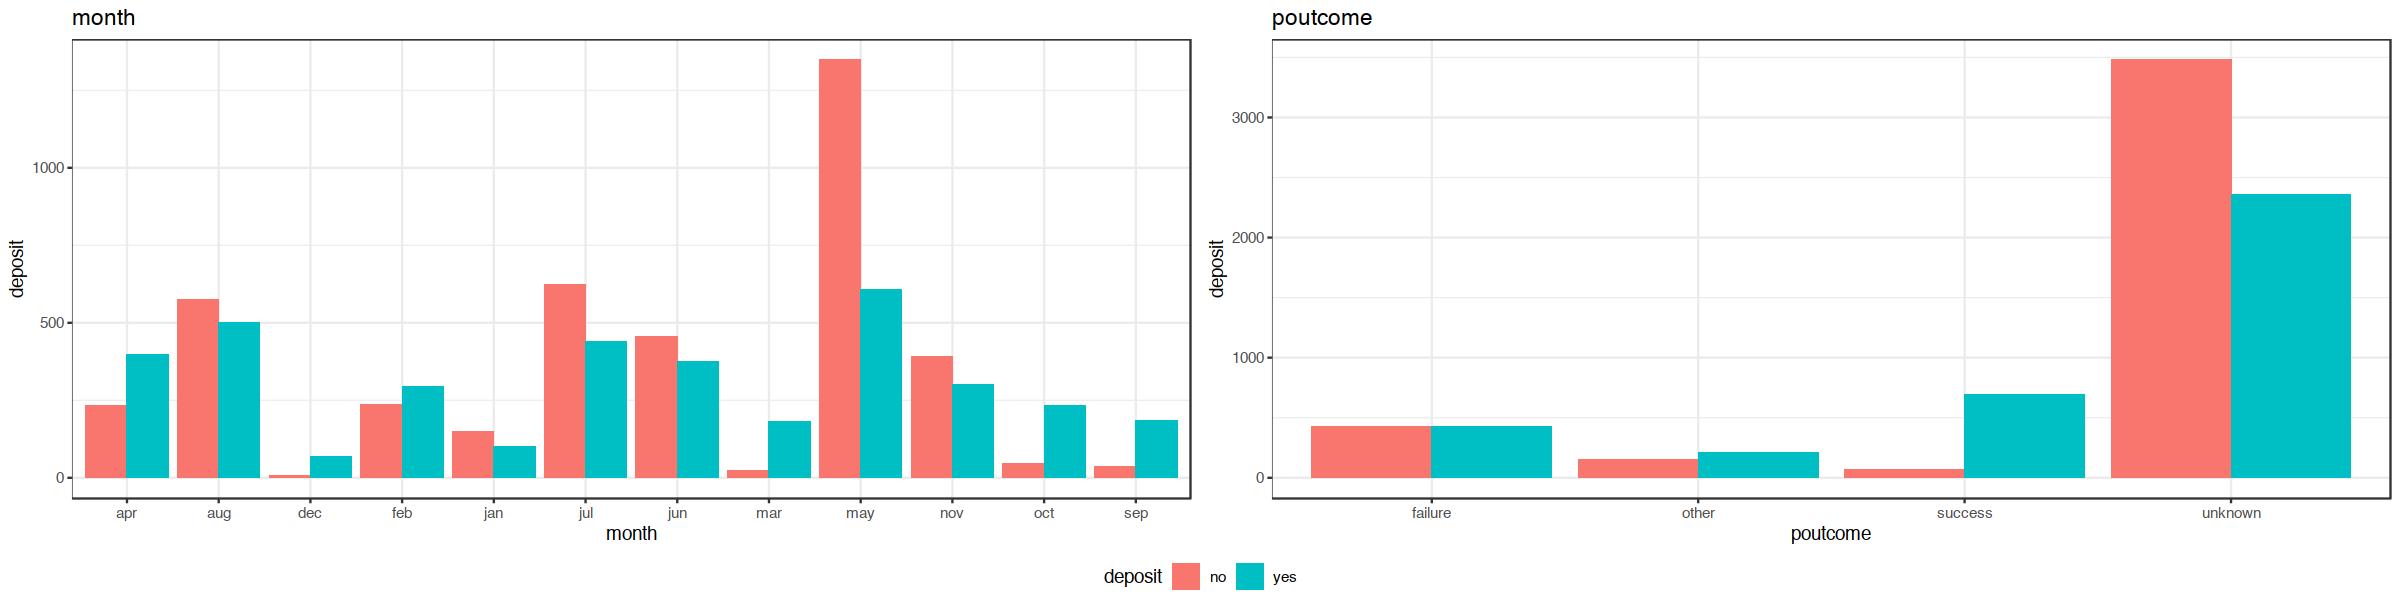

In [178]:
ggplot(data = train) + 
    geom_bar(mapping = aes(x = job, fill = deposit), position="dodge") +
    labs(x = 'job', y = 'deposit') + 
    ggtitle('Job count') +
    theme_bw()
options(repr.plot.width=20, repr.plot.height=5)

ggplot.marital = ggplot(data = train) + 
    geom_bar(mapping = aes(x = marital, fill = deposit), position="dodge") +
    labs(x = 'marital', y = 'deposit') + 
    ggtitle('marital') +
    theme_bw()
ggplot.education = ggplot(data = train) + 
    geom_bar(mapping = aes(x = education, fill = deposit), position="dodge") +
    labs(x = 'education', y = 'deposit') + 
    ggtitle('education') +
    theme_bw()
ggplot.default = ggplot(data = train) + 
    geom_bar(mapping = aes(x = default, fill = deposit), position="dodge") +
    labs(x = 'default', y = 'deposit') + 
    ggtitle('default') +
    theme_bw()
ggarrange(ggplot.marital, ggplot.education, ggplot.default, ncol=3, common.legend=T, legend="bottom")

ggplot.housing = ggplot(data = train) + 
    geom_bar(mapping = aes(x = housing, fill = deposit), position="dodge") +
    labs(x = 'housing', y = 'deposit') + 
    ggtitle('housing') +
    theme_bw()
ggplot.loan = ggplot(data = train) + 
    geom_bar(mapping = aes(x = loan, fill = deposit), position="dodge") +
    labs(x = 'loan', y = 'deposit') + 
    ggtitle('loan') +
    theme_bw()
ggplot.contact = ggplot(data = train) + 
    geom_bar(mapping = aes(x = contact, fill = deposit), position="dodge") +
    labs(x = 'contact', y = 'deposit') + 
    ggtitle('contact') +
    theme_bw()
ggarrange(ggplot.housing, ggplot.loan, ggplot.contact, ncol=3, common.legend=T, legend="bottom")

ggplot.month = ggplot(data = train) + 
    geom_bar(mapping = aes(x = month, fill = deposit), position="dodge") +
    labs(x = 'month', y = 'deposit') + 
    ggtitle('month') +
    theme_bw()
ggplot.poutcome = ggplot(data = train) + 
    geom_bar(mapping = aes(x = poutcome, fill = deposit), position="dodge") +
    labs(x = 'poutcome', y = 'deposit') + 
    ggtitle('poutcome') +
    theme_bw()
ggarrange(ggplot.month, ggplot.poutcome, ncol=2, common.legend=T, legend="bottom")

Above plots, we visualize the relationships between deposit and job/marital/education/default/housing/loan/contact/month/poutcome.

From `job` histgram, we can see the retired are more willing to subscribe the deposit than any other people of different jobs.

From `marital` histgram, the single are more likely to subscribe the deposit.

From `education` histgram, the tertiary are more likely to subscribe the deposit.

From `default` histgram, there is little we can tell.

From `housing` histgram, people who don't own a housing will more likely to subscribe the deposit.

From `loan` histgram, there is little we can tell.

From `contact` histgram, the cellular owner are more likely to subscribe the deposit.

From `month` histgram, deposit action happens most frequently in May.

From `poutcome` histgram, the success will more likely to subscribe the deposit.

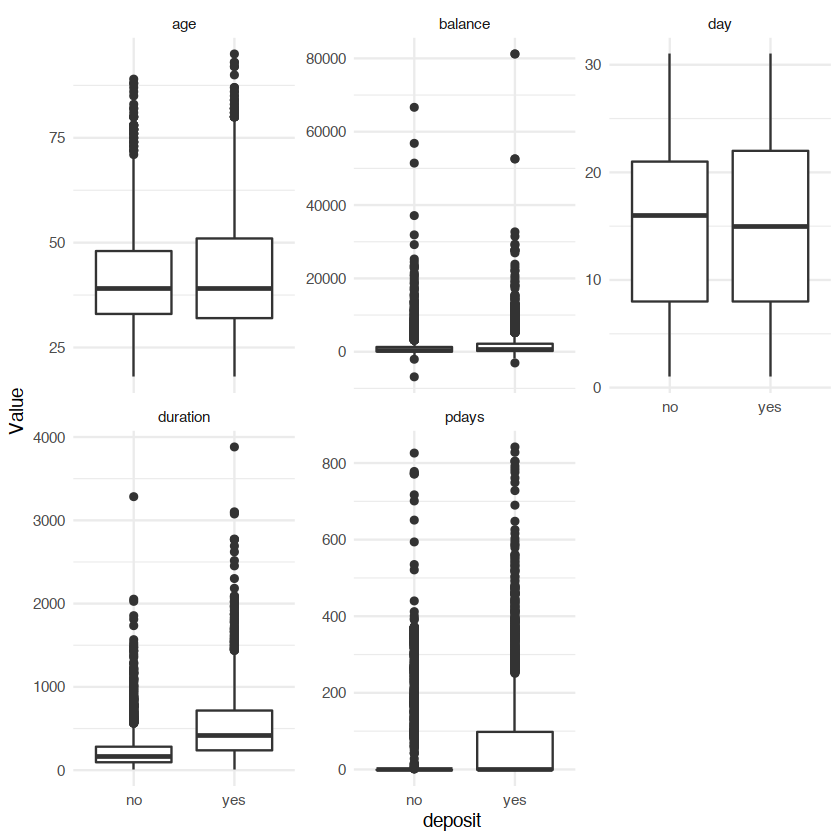

In [170]:
ser_var = c("age", "balance", "duration", "pdays", "day")
dat.explore.3 = train[, c(ser_var, "deposit")]
# Transform from wide table to long table
dat.explore.4 = gather(dat.explore.3, key = "Variable", value = "Value", -c("deposit"))
ggplot(dat.explore.4) + geom_boxplot(aes(x = deposit, y = Value)) + facet_wrap(.~Variable, scales = "free_y") + theme_minimal()

From above, we can see that the average `age` of people who subscribe the deposit is similar to people who do not subscirbe, but the people who subscribe the deposit seem to cover larger range of `age`. However, there is no obvious evidence that there is difference in `balance` between people who do or do not subscribe the deposit. The third boxplot shows that people tends to subscribe deposit in the earlier `days` of a month. And people who subscribe deposit significantly have longer `duration`(last contact duration). Then the last boxplot shows that average `pdays` of people who subscribe the deposit is similar to people who do not subscirbe, but the people who subscribe the deposit seem to cover larger range of `pdays`.

## 2. Fit a classification tree on the training set. Using only the training data, choose the optimal size of the tree and explain why the tree you chose is optimal.

In [55]:
library(rpart)
library(rpart.plot)
library(rattle)
tree.gini = rpart(deposit ~ ., train, parms = list(split = "gini"), method = "class")

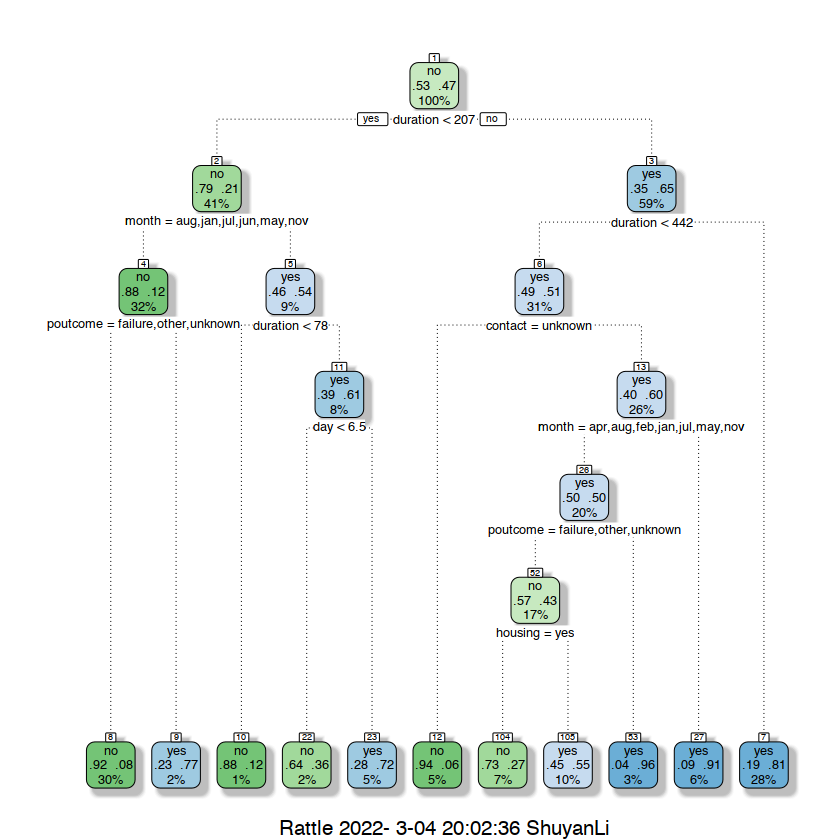

In [56]:
fancyRpartPlot(tree.gini)


Classification tree:
rpart(formula = deposit ~ ., data = train, method = "class", 
    parms = list(split = "gini"))

Variables actually used in tree construction:
[1] contact  day      duration housing  month    poutcome

Root node error: 3685/7813 = 0.47165

n= 7813 

        CP nsplit rel error  xerror      xstd
1 0.377748      0   1.00000 1.00000 0.0119741
2 0.047761      1   0.62225 0.62687 0.0109461
3 0.025237      3   0.52673 0.50258 0.0102008
4 0.020081      5   0.47626 0.49281 0.0101316
5 0.018589      6   0.45617 0.47680 0.0100146
6 0.017910      8   0.41900 0.45780 0.0098696
7 0.013569      9   0.40109 0.42198 0.0095772
8 0.010000     10   0.38752 0.40787 0.0094547


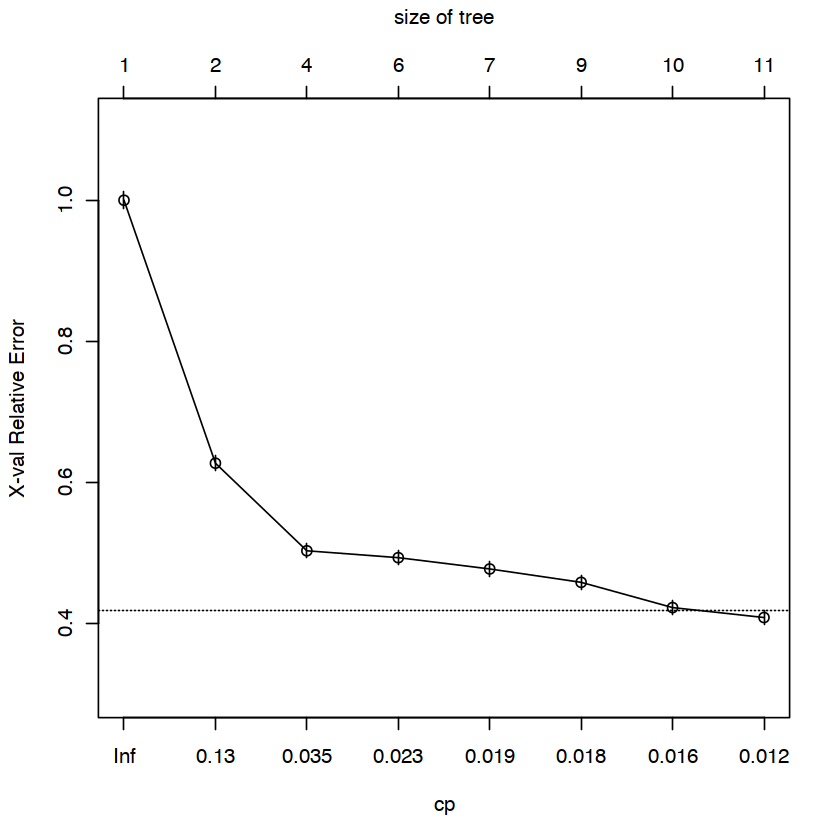

In [57]:
tree.gini = rpart(deposit ~ ., data = train, parms = list(split = "gini"), method = "class")
printcp(tree.gini)
plotcp(tree.gini)

When calling `rpart` without specifying `cp`, the miss-classification loss (risk) for each sub-tree is calculated by comparing the class predicted for the validation fold vs. actual class; and this risk value for each sub-tree is summed up for all folds. And the function will return a model with the lowest risk. `plotcp` will plot the relative cross-validation error for each sub-tree from smallest to largest. 

As shown in the plot, cp for 0.010 shows the best performance by the lowest error rate, so we choose ``cp=0.010`` and refit the model. And the optimal `size of tree` is 11.

Then we can try information gain and compare the result with the model based on gini index. 

Suppose training and testing set have the same label distribution. We can assign weights to adjust the unbalance to reduce the second error. 


Classification tree:
rpart(formula = deposit ~ ., data = train, weights = w, parms = list(split = "information"))

Variables actually used in tree construction:
[1] contact  day      duration housing  month    poutcome

Root node error: 7813/7813 = 1

n= 7813 

        CP nsplit rel error  xerror      xstd
1 0.377748      0   1.00000 1.00000 0.0082234
2 0.049254      1   0.62225 0.63365 0.0075408
3 0.021031      3   0.52374 0.52564 0.0071133
4 0.018589      6   0.45346 0.47571 0.0068721
5 0.017910      8   0.41628 0.45997 0.0067897
6 0.013569      9   0.39837 0.43229 0.0066369
7 0.010000     10   0.38480 0.41194 0.0065177


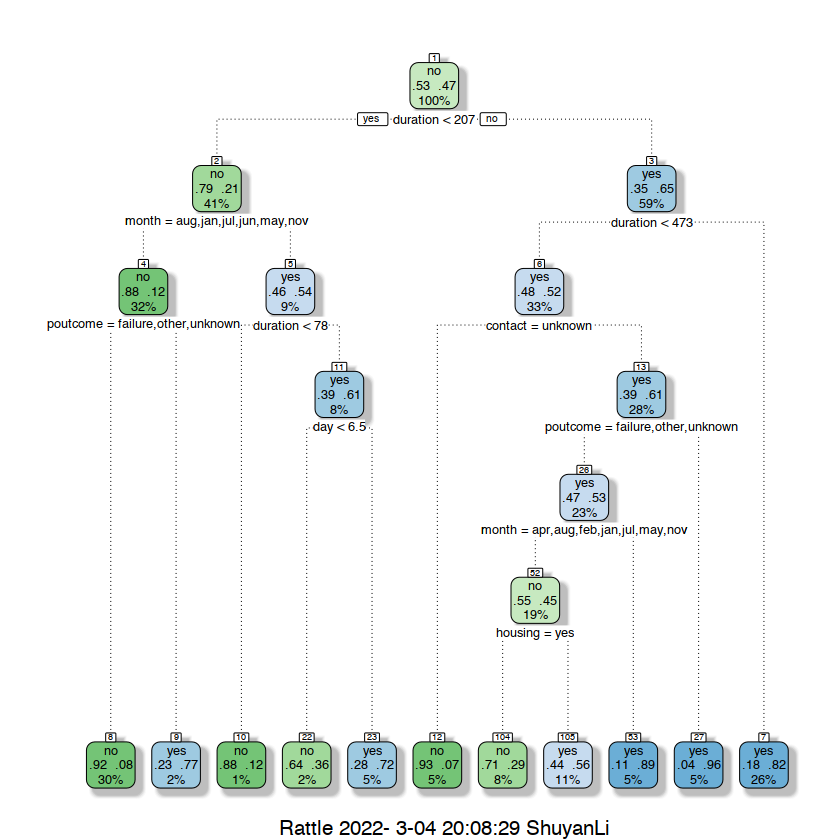

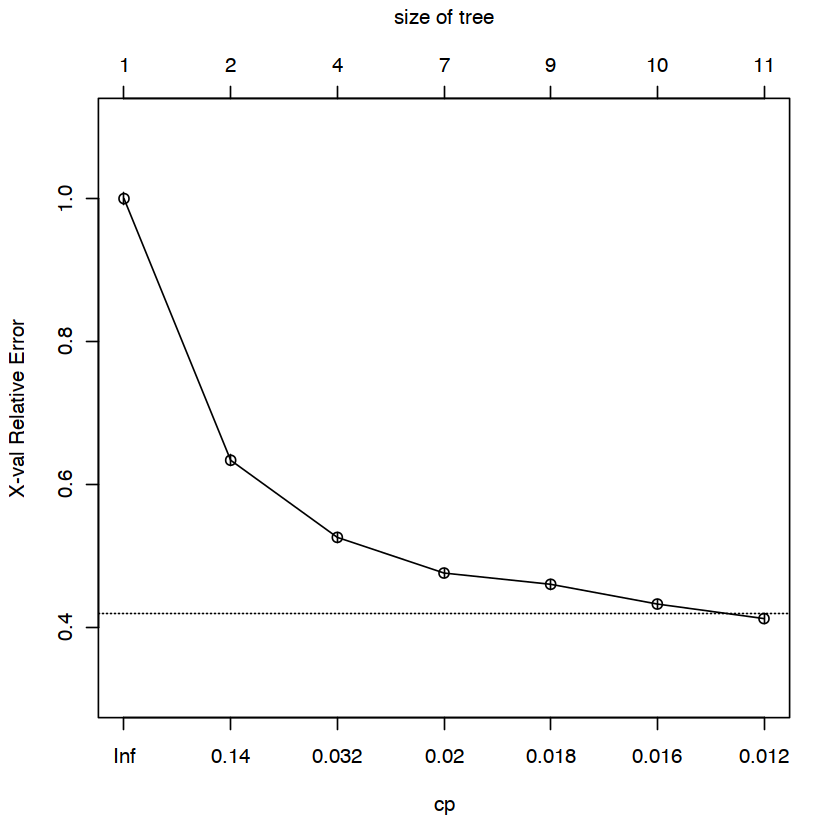

In [59]:
prop = table(train$deposit) / dim(train)[1]
w = rep(1/prop[2], dim(train)[1])
w[which(train$spam == "no")] = 1/prop[1]

tree.info = rpart(deposit ~ ., train, parms = list(split = "information"), weights = w)
fancyRpartPlot(tree.info)
printcp(tree.info)
plotcp(tree.info)

Information gain criterion also gives ``cp=0.010`` and refitting the model would give similar accuracy. And the optimal ``size of tree`` should be 11.

## 3. Report training and test errors for your tree, both overall and for each class separately.

### For gini:

In [114]:
tree.gini = rpart(deposit ~ ., data = train, parms = list(split = "gini"), method = "class", cp=0.010)
set.seed(2)
train.pred = predict(tree.gini, train, type = "class")

The confusion table and error rate on train data are as follows:

In [115]:
table(train.pred, train$deposit)
gini.trainerror = sum(train.pred != train$deposit) / dim(train)[1]
gini.trainerror

          
train.pred   no  yes
       no  3148  448
       yes  980 3237

[1] 0.1827723

In [44]:
448/(448+3237)

[1] 0.1215739

In [43]:
980/(980+3148)

[1] 0.2374031

The overall training error is 0.1828. And for `yes` class, the error is 0.1216. For `no` class, the error is 0.2374.

And those on test data are as follows:

In [138]:
test.pred = predict(tree.gini, test, type = "class")
table(test.pred, test$deposit)
gini.testerror = sum(test.pred != test$deposit) / dim(test)[1]
gini.testerror

         
test.pred   no  yes
      no  1330  192
      yes  415 1412

[1] 0.1812481

In [117]:
192/(192+1412)

[1] 0.1197007

In [46]:
415/(415+1330)

[1] 0.2378223

The overall testing error is 0.1812. And for `yes` class, the error is 0.1197. For `no` class, the error is 0.2378.

### For information tree:

In [139]:
tree.info = rpart(deposit ~ ., train, parms = list(split = "information"), cp = 0.010, weights = w)
train.pred = predict(tree.info, train, type = "class")
table(train.pred, train$deposit)
info.trainerror = sum(train.pred != train$deposit) / dim(train)[1]
info.trainerror

          
train.pred   no  yes
       no  3184  474
       yes  944 3211

[1] 0.1814924

In [119]:
474/(474+3211)

[1] 0.1286296

In [120]:
944/(944+3184)

[1] 0.2286822

The overall training error is 0.1815. And for `yes` class, the error is 0.1286. For `no` class, the error is 0.2287.

In [133]:
test.pred = predict(tree.info, test, type = "class")
table(test.pred, test$deposit)
info.testerror = sum(test.pred != test$deposit) / dim(test)[1]
info.testerror

         
test.pred   no  yes
      no  1345  207
      yes  400 1397

[1] 0.1812481

In [135]:
207/(207+1397)

[1] 0.1290524

In [136]:
400/(400+1345)

[1] 0.2292264

The overall training error is 0.1812. And for `yes` class, the error is 0.1291. For `no` class, the error is 0.2292.

## 4. Plot a subtree of the optimal tree with no more than 8 terminal nodes. List the variables used in this tree, and comment on how that ties in with your exploratory analysis in question 1.

When there is 8 terminal nodes, `cp` should be 0.018.

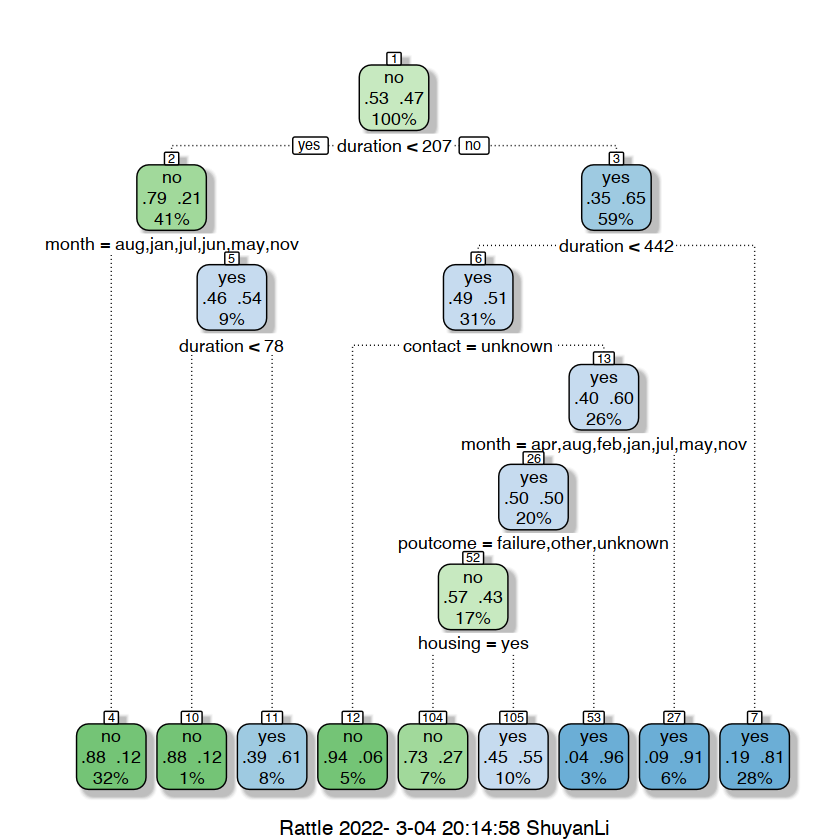

In [64]:
subtree.gini = rpart(deposit ~ ., data = train, parms = list(split = "gini"), method = "class", cp=0.018)
fancyRpartPlot(subtree.gini)

The variables used are `duration`, `contact`, `month`, `poutcome` and `housing`. 

In question 1, we get that:

People who subscribe deposit significantly have longer `duration`(last contact duration).

From `housing` histgram, people who don't own a housing will more likely to subscribe the deposit.

From `contact` histgram, the cellular owner are more likely to subscribe the deposit.

From `month` histgram, deposit action happens most frequently in May.

From `poutcome` histgram, the success will more likely to subscribe the deposit.

The above 5 variables all shows importance.

## 5. Fit Random Forest to the same data, report all the error rates, and compare to what you found in question 3. Report up to 8 most important variables according to variable importance, and compare to the variables used in question 4. Describe the effect of varying parameters mtry, nodesize, and ntree on the error rates.

In [65]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


载入程辑包：‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:rattle’:

    importance




In [68]:
train$deposit = factor(train$deposit)
rf_deposit = randomForest(deposit ~ .,
    data = train, mtry = floor(sqrt(16)),
    importance = TRUE
)
rf_train_pred = predict(rf_deposit, newdata = train)
rf_train_err = mean(rf_train_pred != train$deposit)
rf_train_err

[1] 0

In [69]:
rf_test_pred = predict(rf_deposit, newdata = test)
rf_test_err = mean(rf_test_pred != test$deposit)
rf_test_err

[1] 0.1552702

In [137]:
# Compare the error with question 3.
data.frame("Tree type" = c("gini", "information", "random forest"),
           "Train error" = c(gini.trainerror, info.trainerror, rf_train_err),
           "Test error" = c(gini.testerror, info.testerror, rf_test_err))

Tree.type,Train.error,Test.error
<chr>,<dbl>,<dbl>
gini,0.1827723,0.1812481
information,0.1814924,0.1812481
random forest,0.0000000,0.1534787


We can see `Random Forest` method leads to lowest test error.

Then we show the importance table. And we already know that the column called MeanDecreaseAccuracy contains a measure of the extent to which a variable improves the accuracy of the forest in predicting the classification. Higher values mean that the variable improves prediction.

In [86]:
table = importance(rf_deposit)[1:16,]
table[order(table[,"MeanDecreaseAccuracy"], decreasing = TRUE),]

,no,yes,MeanDecreaseAccuracy,MeanDecreaseGini
duration,201.230079,236.8388301,266.425383,1374.538001
month,63.747427,28.1692346,65.990603,319.449743
contact,49.990546,28.8509348,59.222912,166.912915
housing,40.690801,38.9325336,54.572046,136.120342
age,32.926547,30.1491785,43.729298,318.794766
day,43.756432,14.8103202,43.648036,277.806730
pdays,24.057545,25.5447705,36.556255,180.453335
poutcome,50.925841,0.1114813,29.619417,140.562426
campaign,15.519012,16.7216951,22.923136,127.114792
balance,13.729891,16.8433915,22.355108,330.643498


Here we can see 8 most important variables according to variable importance are `duration`, `month`, `contact`, `housing`, `age`, `day`, `pdays`, `poutcome`. Compared to question 4(`duration`, `contact`, `month`, `poutcome` and `housing`), `age`, `day`, `pdays`, `job` are added but `poutcome` is lost. `duration`, `contact`, `month` and `housing` are always very important.

**The effect of increasing ``mtry`` is ....**

In [95]:
for (mtry in 2:10) {
    train$deposit = factor(train$deposit)
    rf_deposit = randomForest(deposit ~ .,
        data = train, mtry = floor(sqrt(17)),
        importance = TRUE
    )
    rf_test_pred = predict(rf_deposit, newdata = test)
    rf_test_err = mean(rf_test_pred != test$deposit)
    cat(mtry, ' ', rf_test_err, '\n')
}

2   0.156166 
3   0.1552702 
4   0.154673 
5   0.154673 
6   0.154673 
7   0.1528815 
8   0.1573604 
9   0.1567632 
10   0.1534787 


We can see that as mtry increases, random forest test error fluctuate near $0.154$.

**The effect of increasing ``ntree`` is ....**

In [94]:
for (ntree in seq(5, 200, 10)) {
    train$deposit <- factor(train$deposit)
    rf_deposit <- randomForest(deposit ~ .,
        data = train, ntree=ntree,
        importance = TRUE
    )
    rf_test_pred <- predict(rf_deposit, newdata = test)
    rf_test_err <- mean(rf_test_pred != test$deposit)
    print(cat(ntree, ' ', rf_test_err))
}

5   0.1908032NULL
15   0.1663183NULL
25   0.1567632NULL
35   0.1618394NULL
45   0.1588534NULL
55   0.1585548NULL
65   0.1603464NULL
75   0.1564646NULL
85   0.1615408NULL
95   0.1540758NULL
105   0.156166NULL
115   0.1597492NULL
125   0.1582562NULL
135   0.1582562NULL
145   0.1552702NULL
155   0.1582562NULL
165   0.1549716NULL
175   0.156166NULL
185   0.1585548NULL
195   0.1552702NULL


As ntree increases, random forest test error overall goes down but fluctuate near $0.155$.

**The effect of increasing ``nodesize`` is ....**

In [89]:
for (nodesize in 1:4) {
    train$deposit <- factor(train$deposit)
    rf_deposit <- randomForest(deposit ~ .,
        data = train, nodesize = nodesize,
        importance = TRUE
    )
    rf_test_pred <- predict(rf_deposit, newdata = test)
    rf_test_err <- mean(rf_test_pred != test$deposit)
    cat(nodesize, " ", rf_test_err, '\n')
}

1   0.157659 
2   0.1564646 
3   0.1549716 
4   0.1558674 


The larger nodesize, the smaller random forest test error.

## 6. Fit AdaBoost to the same data, report all the error rates and up to 8 most important variables, and compare to what you found before. Describe the effect of varying parameters interaction.depth, shrinkage, and n.trees on the error rates.

In [96]:
library(gbm)

Loaded gbm 2.1.8



In [149]:
ada.train = read.csv("bank_marketing_train.csv", header = TRUE) %>% 
    mutate(across(.cols = c(2:5, 7:9, 11, 16, 17), .fns = as.factor), deposit = if_else(deposit == "yes", 1, 0))
ada.test = read.csv("bank_marketing_test.csv", header = TRUE) %>% 
    mutate(across(.cols = c(2:5, 7:9, 11, 16, 17), .fns = as.factor), deposit = if_else(deposit == "yes", 1, 0))

In [150]:
set.seed(1)
ada_deposit = gbm(deposit~., data = ada.train, distribution = "adaboost", shrinkage=.01, interaction.depth = 3, n.trees = 5000)

In [154]:
ada_trainpred_response = predict(ada_deposit, newdata = ada.train, n.trees = 5000, type = "response")
ada_trainpred = ifelse(ada_trainpred_response>0.5,1,0)
ada_train_err = mean(ada_trainpred!=ada.train$deposit)
ada_train_err

[1] 0.1209523

In [155]:
ada_testpred_response = predict(ada_deposit, newdata = ada.test, n.trees = 5000, type = "response")
ada_testpred = ifelse(ada_testpred_response>0.5,1,0)
ada_test_err = mean(ada_testpred!=ada.test$deposit)
ada_test_err

[1] 0.139146

In [156]:
# Compare the error with question 3.
data.frame("Tree type" = c("gini", "information", "random forest", "ada boost"),
           "Train error" = c(gini.trainerror, info.trainerror, rf_train_err, ada_train_err),
           "Test error" = c(gini.testerror, info.testerror, rf_test_err, ada_test_err))

Tree.type,Train.error,Test.error
<chr>,<dbl>,<dbl>
gini,0.1827723,0.1812481
information,0.1814924,0.1812481
random forest,0.0000000,0.1534787
ada boost,0.1209523,0.1391460


We can see although the train error of ada boost is higher than random forest, test error of ada boost is the lowest.

,var,rel.inf
,<chr>,<dbl>
duration,duration,35.864279687
month,month,22.919590712
poutcome,poutcome,7.784937362
job,job,5.435335932
contact,contact,4.984726668
day,day,4.683451880
balance,balance,4.632824015
age,age,4.263195238
pdays,pdays,3.284603093


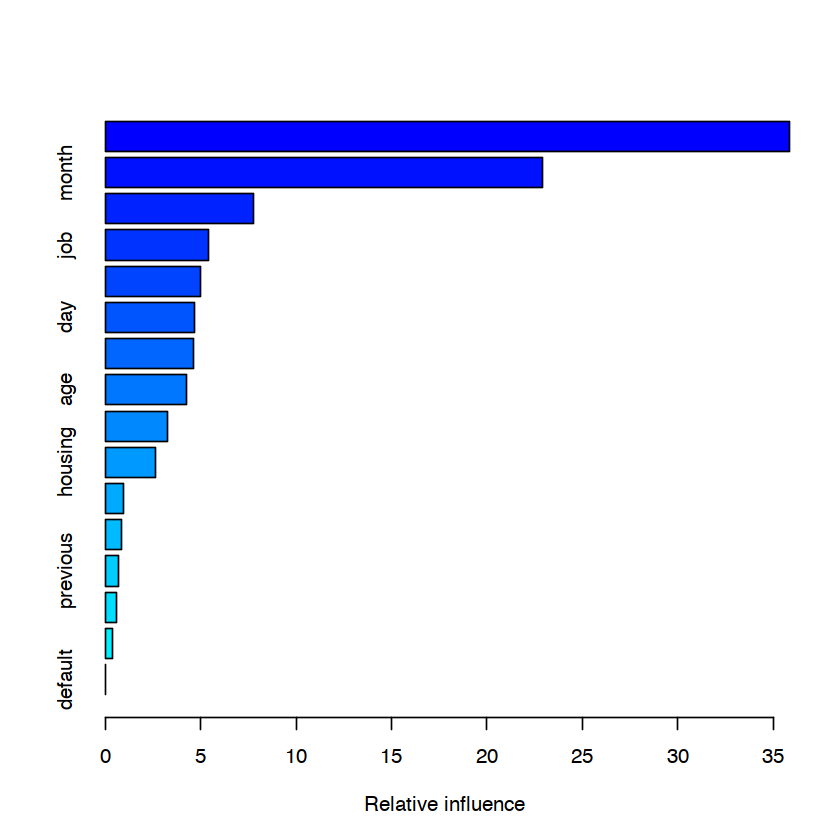

In [151]:
summary(ada_deposit)

By ada boost method, we can see 8 most important variables according to variable importance are `duration`, `month`, `poutcome`, `job`, `contact`, `day`, `balance` and `age`. 

Compared to question 5(Random Forest), 8 most important variables according to variable importance are `duration`, `month`, `contact`, `housing`, `age`, `day`, `pdays`, `poutcome`. 

Compared to question 4(subtree of gini), most important variables are `duration`, `contact`, `month`, `poutcome` and `housing`.

We find that among the three methods, the shared common most important variables are `duration`, `month`, `poutcome`.

Trend of ``n.tree`` drop continuouly. Optimal at $5000$. 

In [166]:
for (n.tree in seq(500, 5000, 500)) {
    ada_pred_response = predict(ada_deposit, newdata = ada.test,
                                type = "response", n.tree=n.tree)
    ada_pred = ifelse(ada_pred_response>0.5,1,0)
    ada_err = mean(ada_pred!=ada.test$deposit)
    cat(n.tree, ' ', ada_err, '\n')
}

500   0.1651239 
1000   0.1558674 
1500   0.1513885 
2000   0.1492983 
2500   0.1463123 
3000   0.1439236 
3500   0.1412362 
4000   0.140639 
4500   0.1400418 
5000   0.139146 


When `shrinkage` increases, the test error will go down first then go up. The optimal `shrinkage` = $0.02$.

In [167]:
for (sh in c(.001, .002, .005, .01, .02, .05, .1)) {
    ada_deposit = gbm(deposit~., data = ada.train, distribution = "adaboost", shrinkage=sh, interaction.depth = 3, n.trees = 5000)
    ada_pred_response = predict(ada_deposit, newdata = ada.test, n.trees = 5000, 
                                type = "response")
    ada_pred = ifelse(ada_pred_response>0.5, 1, 0)
    ada_err = mean(ada_pred!=ada.test$deposit)
    cat(sh, ' ', ada_err, '\n')
}

0.001   0.1657211 
0.002   0.1555688 
0.005   0.1457151 
0.01   0.1400418 
0.02   0.1385488 
0.05   0.1439236 
0.1   0.1489997 


After changing to optimal `shrinkage`, ``n.tree``first goes down and then goes up. And the optimal ``n.tree`` is 7000. 

In [168]:
ada_deposit = gbm(deposit~., data = ada.train, distribution = "adaboost", shrinkage=.02, interaction.depth = 3, n.trees = 20000)
for (n.tree in seq(1000, 20000, 1000)) {
    ada_pred_response = predict(ada_deposit, newdata = ada.test,
                                type = "response", n.tree=n.tree)
    ada_pred = ifelse(ada_pred_response>0.5,1,0)
    ada_err = mean(ada_pred!=ada.test$deposit)
    cat(n.tree, ' ', ada_err, '\n')
}

1000   0.1498955 
2000   0.1424306 
3000   0.1388474 
4000   0.139146 
5000   0.1409376 
6000   0.1388474 
7000   0.1385488 
8000   0.1409376 
9000   0.1403404 
10000   0.1409376 
11000   0.1409376 
12000   0.142132 
13000   0.1415348 
14000   0.142132 
15000   0.1448193 
16000   0.1430278 
17000   0.1466109 
18000   0.1463123 
19000   0.1463123 
20000   0.1484025 


When `shrinkage`=0.02 and `n.trees` = 7000, optimum ``interaction.depth`` is $6$. As `interaction.depth` increases, test error overall goes down but will fluctuate at 0.137.

In [169]:
for (id in 1:6) {
    ada_deposit = gbm(deposit~., data = ada.train, distribution = "adaboost", shrinkage=0.02, interaction.depth = id, n.trees = 7000)
    ada_pred_response = predict(ada_deposit, newdata = ada.test, n.trees = 7000, 
                                type = "response")
    ada_pred = ifelse(ada_pred_response>0.5, 1, 0)
    ada_err = mean(ada_pred!=ada.test$deposit)
    cat(id, ' ', ada_err, '\n')
}

1   0.1675127 
2   0.1400418 
3   0.1397432 
4   0.1379516 
5   0.1388474 
6   0.1364586 
